# Midterm II

---

```{admonition} Revised
22 Apr 2023
```
```{contents}
```

---

## Programming Environment

In [2]:
from fractions import Fraction

import numpy as np
import sympy as sp
from   sympy import init_printing,latex,solve,symbols
from   sympy.matrices import diag,eye,GramSchmidt,ones,Matrix,zeros
from   sympy.solvers.inequalities import reduce_inequalities

x1,x2,x3,x4=symbols('x1 x2 x3 x4')
init_printing(use_latex=True)

import matplotlib        as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot');
plt.rcParams.update({'text.usetex' : True});
%matplotlib inline

from IPython.display import display, Math

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'   :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''           :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'     :<{pad}}: {s.version}")
print(f"{''           :<{pad}}: {s.version_info}")
print(f"{''           :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib' :<{pad}}: {mpl.__version__}")
print(f"{'NumPy'      :<{pad}}: {np .__version__}")
print(f"{'SymPy'      :<{pad}}: {sp .__version__}")

def unitVector (vec : np.ndarray) -> np.ndarray:
  return vec/np.sqrt((vec[0]**2+vec[1]**2))

EXECUTED            : 2023-04-23 13:32:16.037268

Platform            : 13.3.1 | Darwin | 22.4.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:29) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.1
SymPy               : 1.11.1


---

## Production Scenario

    Product A [x1]
        $60.00   sale price
        1 hr     machining
        5 lb     material
        900 unit demand per week

    Product B [x2]
        $90.00   sale price
        2 hr     machining
        4 lb     material
        700 unit demand per week

    supply per week
        1000 hr machining
        3200 lb material

    extra
        $28.00/hr machining [p1]
         $4.00/lb material  [p2]
        
    initial cost D
        $40,800.00 = $28 .00/hr x 1000 hr + $4 .00/lb x 3200 lb

---

## LP

$
\begin{aligned}
\max z(\mathbf{x})&=60x_1+90x_2-40800
\\
g_1(\mathbf{x})&=x_1+2x_2\le1000=b_1
&&\text{machining constraint}
\\
g_2(\mathbf{x})&=5x_1+4x_2\le3200=b_2
&&\text{material constraint}
\\
g_3(\mathbf{x})&=x_1\le900=b_3
&&\text{Product A demand constaint}
\\
g_4(\mathbf{x})&=x_2\le700=b_4
&&\text{Product B demand constraint}
\\
\mathbf{x}&\ge\mathbf{0}
&&\text{no negative production}
\end{aligned}
$

    LP          A       B
    max z =  60x1 +  90x2  - 40800
       g1 =   1x1 +   2x2 <=  1000 = b1   machining constraint
       g2 =   5x1 +   4x2 <=  3200 = b2   material  constraint
       g3 =   1x1 +   0x2 <=   900 = b3   Product A demand constraint
       g4 =   0x1 +   1x2 <=   700 = b4   Product B demand constraint
                        x >= 0            no negative production

---

## Gradients and directions

$
\begin{aligned}
\nabla z&=\langle60,90\rangle
\\
\nabla g_1&=\langle1,2\rangle
&&\langle60,90\rangle\cdot\langle2,-1\rangle
&&\gt0
&&\implies\langle2,-1\rangle
\\
\nabla g_2&=\langle5,4\rangle
&&\langle60,90\rangle\cdot\langle4,-5\rangle
&&\lt0
&&\implies\langle-4,5\rangle
\\
\nabla g_3&=\langle1,0\rangle
&&\langle60,90\rangle\cdot\langle0,-1\rangle
&&\lt0
&&\implies\langle0,1\rangle
\\
\nabla g_4&=\langle0,1\rangle
&&\langle60,90\rangle\cdot\langle1,0\rangle
&&\gt0
&&\implies\langle1,0\rangle
\end{aligned}
$

    delz  = <60,90>
    delg1 = < 1, 2>
    delg2 = < 5, 4>
    delg3 = < 1, 0>
    delg4 = < 0, 1>

    <60,90><2,-1> >0 => < 2,-1> g1
    <60,90><4,-5> <0 => <-4, 5> g2
    <60,90><0,-1> <0 => < 0, 1> g3
    <60,90><1, 0> >0 => < 1, 0> g4

 30
210
 90
 60


'LINES'

'g1'

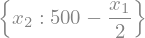

'g2'

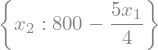

'g4'

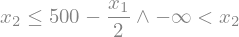

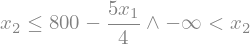

'INTERSECTIONS'

'g1=g2'

'g1=g3'

'g1=g4'

'g2=g3'

'g2=g4'

'g3=g4'

'g1[ 0,x2]'

'g2[x1, 0]'

'g2[ 0,x2]'

'g3[x1, 0]'

'g4[ 0,x2]'

In [3]:
d =40800
b1= 1000
b2= 3200
b3=  900
b4=  700

z =60*x1+90*x2- d
g1= 1*x1+ 2*x2-b1
g2= 5*x1+ 4*x2-b2
g3= 1*x1+ 0*x2-b3
g4= 0*x1+ 1*x2-b4

# GRADIENTS & DIRECTIONS
delz =np.array([60,90])
delg1=np.array([ 1, 2]); dg1=np.array([ 2,-1])
delg2=np.array([ 5, 4]); dg2=np.array([-4, 5])
delg3=np.array([ 1, 0]); dg3=np.array([ 0, 1])
delg4=np.array([ 0, 1]); dg4=np.array([ 1, 0])

# UNIT DIRECTION VECTORS
udg1=dg1/np.sqrt(dg1[0]**2+dg1[1]**2)
udg2=dg2/np.sqrt(dg2[0]**2+dg2[1]**2)
udg3=dg3/np.sqrt(dg3[0]**2+dg3[1]**2)
udg4=dg4/np.sqrt(dg4[0]**2+dg4[1]**2)

print(f"{delz.dot(dg1):>3}")
print(f"{delz.dot(dg2):>3}")
print(f"{delz.dot(dg3):>3}")
print(f"{delz.dot(dg4):>3}")

# LINES & INTERSECTIONS
display(
'LINES',
'g1',solve(g1,x2,dict=True)[0],
'g2',solve(g2,x2,dict=True)[0],
#'g3',solve(g3,x2,dict=True)[0],
'g4',solve(g4,x2,dict=True)[0],
)

display(
reduce_inequalities(g1<=0,[x2]),
reduce_inequalities(g2<=0,[x2]),
reduce_inequalities(g3<=0,[x2]),
reduce_inequalities(g4<=0,[x2]),
)

display(
'INTERSECTIONS',
'g1=g2',   solve([g1,g2],  [x1,x2],dict=True)[0],
'g1=g3',   solve([g1,g3],  [x1,x2],dict=True)[0],
'g1=g4',   solve([g1,g4],  [x1,x2],dict=True)[0],
'g2=g3',   solve([g2,g3],  [x1,x2],dict=True)[0],
'g2=g4',   solve([g2,g4],  [x1,x2],dict=True)[0],
'g3=g4',   solve([g3,g4],  [x1,x2],dict=True)[0],
'g1[ 0,x2]',solve([g1,x1  ],[x1,x2],dict=True)[0],
'g2[x1, 0]',solve([g2,x2  ],[x1,x2],dict=True)[0],
'g2[ 0,x2]',solve([g2,x1  ],[x1,x2],dict=True)[0],
'g3[x1, 0]',solve([g3,x2  ],[x1,x2],dict=True)[0],
'g4[ 0,x2]',solve([g4,x1  ],[x1,x2],dict=True)[0],
)

---

## Dual LP

$
\boxed{
\text{LP}=
\begin{aligned}
\max z(\mathbf{x})&=\mathbf{cx}+d
\\
\mathbf{Ax}&\le\mathbf{b}
\\
\mathbf{x}&\ge\mathbf{0}
\end{aligned}
\overset{\text{dual to}}{\iff}
\begin{aligned}
\min w(\mathbf{y})&=\mathbf{yb}+d
\\
\mathbf{yA}&\ge\mathbf{c}
\\
\mathbf{y}&\ge\mathbf{0}
\end{aligned}
=\text{LP}^*
}
$

<div class="full-width">

$
\text{LP}=
\begin{aligned}
\max z(\mathbf{x})&=60x_1+90x_2-40800
\\
g_1(\mathbf{x})&=x_1+2x_2\le1000=b_1
\\
g_2(\mathbf{x})&=5x_1+4x_2\le3200=b_2
\\
g_3(\mathbf{x})&=x_1\le900=b_3
\\
g_4(\mathbf{x})&=x_2\le700=b_4
\\
\mathbf{x}&\ge\mathbf{0}
\end{aligned}
\overset{\text{dual to}}{\iff}
\begin{aligned}
\min w(\mathbf{y})&=1000y_1+3200y_2+900y_3+700y_4-40800          \\
   h_1(\mathbf{y})&=    y_1+   5y_2+   y_3              \ge60=c_1\\
   h_2(\mathbf{y})&=   2y_1+   4y_2+          y_4       \ge90=c_2\\
       \mathbf{y}&\ge\mathbf{0}
\end{aligned}
=\text{LP}^*
$

</div>

---

## Simplex Algorithm

In [4]:
def pivot (iStar,jStar,tab):
  nRows =tab.shape[0]-1
  nCols =tab.shape[1]-1
  newTab=tab[:,:]

  newTab[0,jStar]    =tab[iStar,nCols]
  newTab[iStar,nCols]=tab[0,jStar]
  newTab[iStar,0]    =-tab[nRows,jStar]
  newTab[nRows,jStar]=-tab[iStar,0]
  
  for i in range(1,nRows):
    for j in range(1,nCols):
      if   i==iStar and j==jStar:
        newTab[i,j]=1/tab[iStar,jStar]
      elif i==iStar and j!=jStar:
        newTab[i,j]=-tab[i,j]/tab[iStar,jStar]
      elif i!=iStar and j==jStar:
        newTab[i,j]= tab[i,j]/tab[iStar,jStar]
      elif i!=iStar and j!=jStar:
        newTab[i,j]= tab[i,j]-tab[iStar,j]*tab[i,jStar]/tab[iStar,jStar]
  return newTab

p1 =28
p2 = 4

db1=0
db2=0
db3=0
db4=0

rA = Matrix([
  [ 'c', 'x1',  'x2',     1, 'r'],
  ['y1',   -1,    -2,b1+db1,'s1'],
  ['y2',   -5,    -4,b2+db2,'s2'],
  ['y3',   -1,     0,b3+db3,'s3'],
  ['y4',    0,    -1,b4+db4,'s4'],
  [  -1,  -60,   -90,     d,'-z'],
  [ 'c','-v1', '-v2',   'w', 'r'],
])
rB = pivot(2,1,rA)
rC = pivot(1,2,rB)

cA = Matrix([
  [ 'c',  'y1',  'y2',  'y3',  'y4',   1, 'r'],
  ['x1',     1,     5,     1,     0, -60,'v1'],
  ['x2',     2,     4,     0,     1, -90,'v2'],
  [  -1,b1+db1,b2+db2,b3+db3,b4+db4,  -d, 'w'],
  [ 'c', '-s1', '-s2', '-s3', '-s4','-z', 'r'],
])
cB = pivot(2,1,cA)
cC = pivot(1,2,cB)

display(
  'ROW',
  Math(fr'rA = {latex(rA)}\,\,\,\,\,x_1=x_2=0'),
  Math(fr'rB = {latex(rB)}\,\,\,\,\,x_2=s_2=0'),
  Math(fr'rC = {latex(rC)}\,\,\,\,\,s_1=s_2=0'),
  'COLUMN',
  Math(fr'cA = {latex(cA)}\,\,\,\,\,x_1=x_2=0'),
  Math(fr'cB = {latex(cB)}\,\,\,\,\,x_1=s_1=0'),
  Math(fr'cC = {latex(cC)}\,\,\,\,\,s_1=s_2=0'),
)

'ROW'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'COLUMN'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
xStar = (400,300)
zStar = z.subs([(x1,xStar[0]),(x2,xStar[1])])
yStar = (35,5,0,0)

print(f"xStar =  {xStar}")
print(f"zStar = ${int(zStar):,.2f} = wStar")
print(f"yStar =  {yStar}")

xStar =  (400, 300)
zStar = $10,200.00 = wStar
yStar =  (35, 5, 0, 0)


---

## Graphical

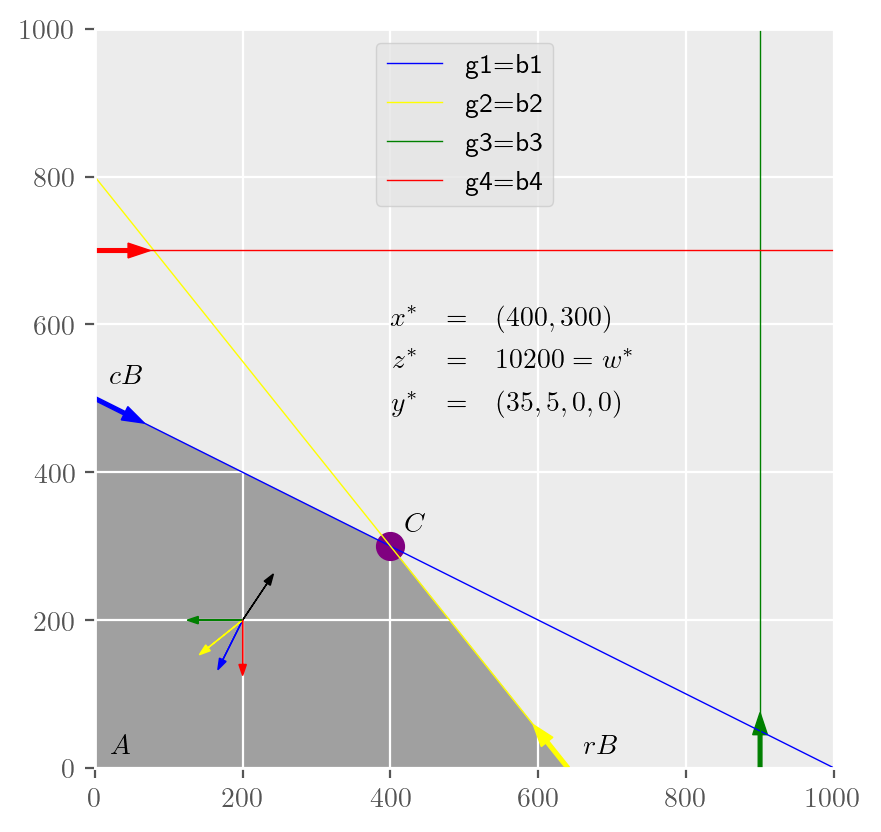

In [6]:
s =1000
x =np.linspace(0,s,10001)

# LINES
y1=-(1/2)*x+500
y2=-(5/4)*x+800
#y3
y4= (  0)*x+700

fig=plt.figure(dpi=200);
ax =plt.subplot();
ax.set_aspect(1);

# LINES
ax.plot   (x,y1,label='g1=b1',linewidth=0.5,color='blue');
ax.plot   (x,y2,label='g2=b2',linewidth=0.5,color='yellow');
ax.axvline( 900,label='g3=b3',linewidth=0.5,color='green');
ax.plot   (x,y4,label='g4=b4',linewidth=0.5,color='red');

# delz
ax.arrow(200,200,*unitVector(  delz)*75,color='black', width=0.01,head_width=10,length_includes_head=True);
# FEASIBLE SIDES <=
ax.arrow(200,200,*unitVector(-delg1)*75,color='blue',  width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg2)*75,color='yellow',width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg3)*75,color='green', width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg4)*75,color='red',   width=0.01,head_width=10,length_includes_head=True);

# DIRECTIONS
ax.arrow(  0,500,*udg1*75,width=5,head_width=20,length_includes_head=True,color='blue');
ax.arrow(640,  0,*udg2*75,width=5,head_width=20,length_includes_head=True,color='yellow');
ax.arrow(900,  0,*udg3*75,width=5,head_width=20,length_includes_head=True,color='green');
ax.arrow(  0,700,*udg4*75,width=5,head_width=20,length_includes_head=True,color='red');

fx,fy=np.meshgrid(x,x)
plt.imshow(
  (
      (fy<=-(1/2)*fx+500)
    & (fy<=-(5/4)*fx+800)
    & (fy<= (  0)*fx+700)
  ).astype(int),
  extent=(fx.min(),fx.max(),fy.min(),fy.max()),
  origin='lower',
  cmap  ='Greys',
  alpha =0.3,
);

ax.set_xlim(0,s);
ax.set_ylim(0,s);
ax.legend();

# xStar
ax.scatter(400,300,s=1e2,color='purple');

sol=(
  r'\begin{eqnarray*}'
  r'x^*&=&(400,300)'
  r'\\'
  r'z^*&=&10200=w^*'
  r'\\'
  r'y^*&=&(35,5,0,0)'
  r'\end{eqnarray*}'
)
ax.text(400,600,sol,fontsize=10);

# SIMPLEX
dx,dy=20,20
ax.annotate( '$A$',(  0+dx,  0+dy));
ax.annotate('$rB$',(640+dx,  0+dy));
ax.annotate('$cB$',(  0+dx,500+dy));
ax.annotate( '$C$',(400+dx,300+dy));

---

## Should the company buy more material?

In [7]:
print(f"xStar =  {xStar}")
print(f"zStar = ${int(zStar):,.2f} = wStar")
print(f"yStar =  {yStar}")

xStar =  (400, 300)
zStar = $10,200.00 = wStar
yStar =  (35, 5, 0, 0)


In [8]:
ROI1=(yStar[0]-p1)/p1
ROI2=(yStar[1]-p2)/p2

db2   =g2.subs([(x1,900),(x2,50)])
dzStar=(yStar[1]-p2)*db2

r2cost=p2*db2

display(
  ROI1,
  ROI2,
  db2,
  dzStar,
  zStar+dzStar,
  r2cost,
)

In [9]:
def pivot (iStar,jStar,tab):
  nRows =tab.shape[0]-1
  nCols =tab.shape[1]-1
  newTab=tab[:,:]

  newTab[0,jStar]    =tab[iStar,nCols]
  newTab[iStar,nCols]=tab[0,jStar]
  newTab[iStar,0]    =-tab[nRows,jStar]
  newTab[nRows,jStar]=-tab[iStar,0]
  
  for i in range(1,nRows):
    for j in range(1,nCols):
      if   i==iStar and j==jStar:
        newTab[i,j]=1/tab[iStar,jStar]
      elif i==iStar and j!=jStar:
        newTab[i,j]=-tab[i,j]/tab[iStar,jStar]
      elif i!=iStar and j==jStar:
        newTab[i,j]= tab[i,j]/tab[iStar,jStar]
      elif i!=iStar and j!=jStar:
        newTab[i,j]= tab[i,j]-tab[iStar,j]*tab[i,jStar]/tab[iStar,jStar]
  return newTab

p1 =28
p2 = 4

rA = Matrix([
  [ 'c', 'x1',  'x2',       1, 'r'],
  ['y1',   -1,    -2,  b1+db1,'s1'],
  ['y2',   -5,    -4,  b2+db2,'s2'],
  ['y3',   -1,     0,  b3+db3,'s3'],
  ['y4',    0,    -1,  b4+db4,'s4'],
  [  -1,  -60,   -90,d+r2cost,'-z'],
  [ 'c','-v1', '-v2',     'w', 'r'],
])
rB = pivot(2,1,rA)
rC = pivot(1,2,rB)
rD = pivot(3,1,rC)

cA = Matrix([
  [ 'c',  'y1',  'y2',  'y3',  'y4',          1, 'r'],
  ['x1',     1,     5,     1,     0,        -60,'v1'],
  ['x2',     2,     4,     0,     1,        -90,'v2'],
  [  -1,b1+db1,b2+db2,b3+db3,b4+db4,-(d+r2cost), 'w'],
  [ 'c', '-s1', '-s2', '-s3', '-s4',       '-z', 'r'],
])
cB = pivot(2,1,cA)
cC = pivot(1,2,cB)
cD = pivot(1,3,cC)

display(
  'ROW',
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,rA = {latex(rA)}\,\,\,\,\,x_1=x_2=0'),
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,rB = {latex(rB)}\,\,\,\,\,x_2=s_2=0'),
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,rC = {latex(rC)}\,\,\,\,\,s_1=s_2=0'),
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,rD = {latex(rD)}\,\,\,\,\,s_1=s_3=0'),
  'COLUMN',
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,cA = {latex(cA)}\,\,\,\,\,x_1=x_2=0'),
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,cB = {latex(cB)}\,\,\,\,\,x_1=s_1=0'),
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,cC = {latex(cC)}\,\,\,\,\,s_1=s_2=0'),
  Math(fr'db = ({db1},{db2},{db3},{db4})\,\,\,cD = {latex(cD)}\,\,\,\,\,s_1=s_3=0'),
)

'ROW'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

'COLUMN'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
xStar1  = (900,50)
zStar1  = z.subs([(x1,xStar1[0]),(x2,xStar1[1])])
ycStar1 = (35,5, 0,0)
ydStar1 = (45,0,15,0)

print(f"xStar =  {xStar1}")
print(f"zStar = ${int(zStar1):,.2f} = wStar")
print(f"yStar =  {ycStar1}")
print(f"yStar =  {ydStar1}")

xStar =  (900, 50)
zStar = $17,700.00 = wStar
yStar =  (35, 5, 0, 0)
yStar =  (45, 0, 15, 0)


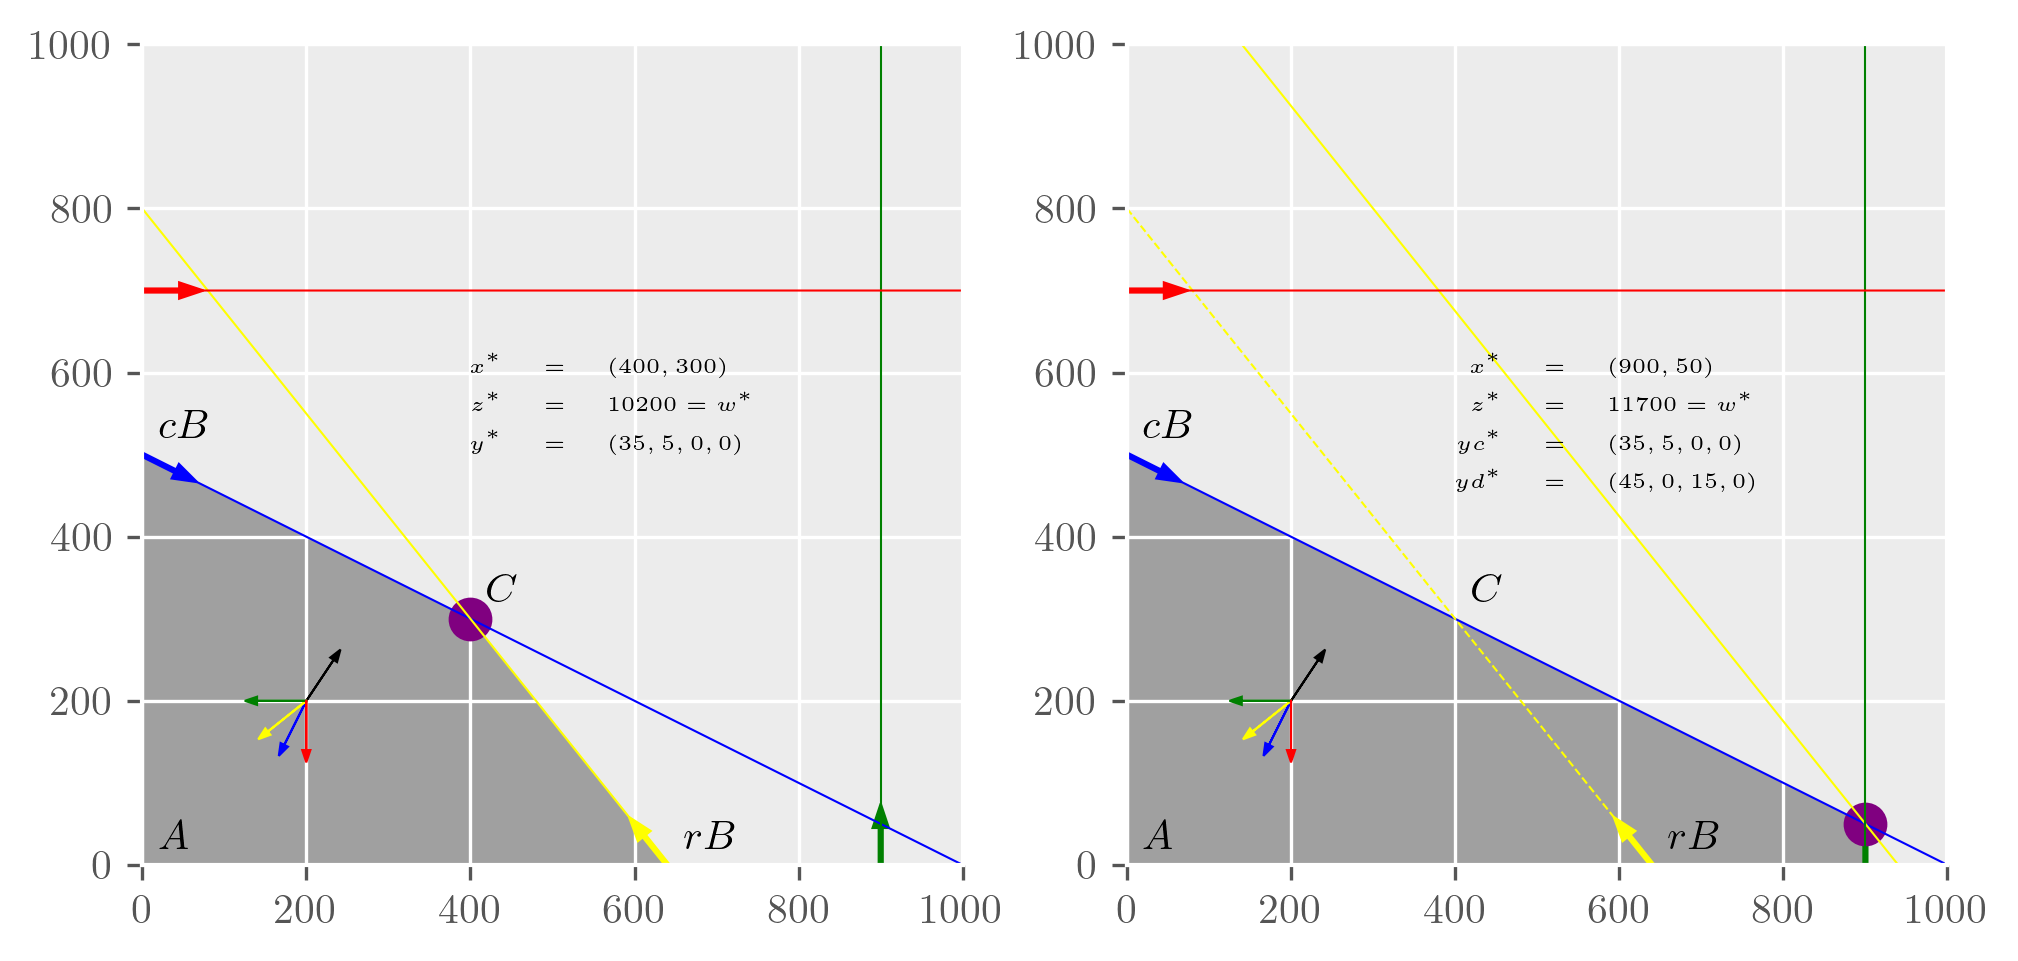

In [11]:
s =1000
x =np.linspace(0,s,10001)

# LINES
y1=-(1/2)*x+500
y2=-(5/4)*x+800
#y3
y4= (  0)*x+700

fig=plt.figure(dpi=300,figsize=(12,16));
ax =plt.subplot(131);
ax.set_aspect(1);

# LINES
ax.plot   (x,y1,label='g1=b1',linewidth=0.5,color='blue');
ax.plot   (x,y2,label='g2=b2',linewidth=0.5,color='yellow');
ax.axvline( 900,label='g3=b3',linewidth=0.5,color='green');
ax.plot   (x,y4,label='g4=b4',linewidth=0.5,color='red');

# delz
ax.arrow(200,200,*unitVector(  delz)*75,color='black', width=0.01,head_width=10,length_includes_head=True);
# FEASIBLE SIDES <=
ax.arrow(200,200,*unitVector(-delg1)*75,color='blue',  width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg2)*75,color='yellow',width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg3)*75,color='green', width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg4)*75,color='red',   width=0.01,head_width=10,length_includes_head=True);

# DIRECTIONS
ax.arrow(  0,500,*udg1*75,width=5,head_width=20,length_includes_head=True,color='blue');
ax.arrow(640,  0,*udg2*75,width=5,head_width=20,length_includes_head=True,color='yellow');
ax.arrow(900,  0,*udg3*75,width=5,head_width=20,length_includes_head=True,color='green');
ax.arrow(  0,700,*udg4*75,width=5,head_width=20,length_includes_head=True,color='red');

fx,fy=np.meshgrid(x,x)
plt.imshow(
  (
      (fy<=-(1/2)*fx+500)
    & (fy<=-(5/4)*fx+800)
    & (fy<= (  0)*fx+700)
  ).astype(int),
  extent=(fx.min(),fx.max(),fy.min(),fy.max()),
  origin='lower',
  cmap  ='Greys',
  alpha =0.3,
);

ax.set_xlim(0,s);
ax.set_ylim(0,s);
#ax.legend();

# xStar
ax.scatter(400,300,s=1e2,color='purple');

xStar=(
  r'\begin{eqnarray*}'
  r'x^*&=&(400,300)'
  r'\\'
  r'z^*&=&10200=w^*'
  r'\\'
  r'y^*&=&(35,5,0,0)'
  r'\end{eqnarray*}'
)
ax.text(400,600,xStar,fontsize=5);

# SIMPLEX
dx,dy=20,20
ax.annotate( '$A$',(  0+dx,  0+dy));
ax.annotate('$rB$',(640+dx,  0+dy));
ax.annotate('$cB$',(  0+dx,500+dy));
ax.annotate( '$C$',(400+dx,300+dy));

##########

ax2 =plt.subplot(132);
ax2.set_aspect(1);

# LINES
ax2.plot   (x,y1,label='g1=b1',linewidth=0.5,color='blue');
ax2.plot   (x,y2,label='g2=b2',linewidth=0.5,color='yellow',linestyle='--');
ax2.plot   (x,-(5/4)*(x-900)+50,label='g2=b2',linewidth=0.5,color='yellow');
ax2.axvline( 900,label='g3=b3',linewidth=0.5,color='green');
ax2.plot   (x,y4,label='g4=b4',linewidth=0.5,color='red');

# delz
ax2.arrow(200,200,*unitVector(  delz)*75,color='black', width=0.01,head_width=10,length_includes_head=True);
# FEASIBLE SIDES <=
ax2.arrow(200,200,*unitVector(-delg1)*75,color='blue',  width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg2)*75,color='yellow',width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg3)*75,color='green', width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg4)*75,color='red',   width=0.01,head_width=10,length_includes_head=True);

# DIRECTIONS
ax2.arrow(  0,500,*udg1*75,width=5,head_width=20,length_includes_head=True,color='blue');
ax2.arrow(640,  0,*udg2*75,width=5,head_width=20,length_includes_head=True,color='yellow');
ax2.arrow(900,  0,*udg3*75,width=5,head_width=20,length_includes_head=True,color='green');
ax2.arrow(  0,700,*udg4*75,width=5,head_width=20,length_includes_head=True,color='red');

fx,fy=np.meshgrid(x,x)
plt.imshow(
  (
      (fy<=-(1/2)* fx+500)
    & (fy<=-(5/4)*(fx-900)+50)
    & (fx<=900)
    & (fy<= (  0)* fx+700)
  ).astype(int),
  extent=(fx.min(),fx.max(),fy.min(),fy.max()),
  origin='lower',
  cmap  ='Greys',
  alpha =0.3,
);

ax2.set_xlim(0,s);
ax2.set_ylim(0,s);
#ax.legend();

# xStar
ax2.scatter(900, 50,s=1e2,color='purple');

xStar=(
  r'\begin{eqnarray*}'
  r'x^*&=&(900, 50)'
  r'\\'
  r'z^*&=&11700=w^*'
  r'\\'
  r'yc^*&=&(35,5,0,0)'
    r'\\'
  r'yd^*&=&(45,0,15,0)'
  r'\end{eqnarray*}'
)
ax2.text(400,600,xStar,fontsize=5);

# SIMPLEX
dx,dy=20,20
ax2.annotate( '$A$',(  0+dx,  0+dy));
ax2.annotate('$rB$',(640+dx,  0+dy));
ax2.annotate('$cB$',(  0+dx,500+dy));
ax2.annotate( '$C$',(400+dx,300+dy));

---

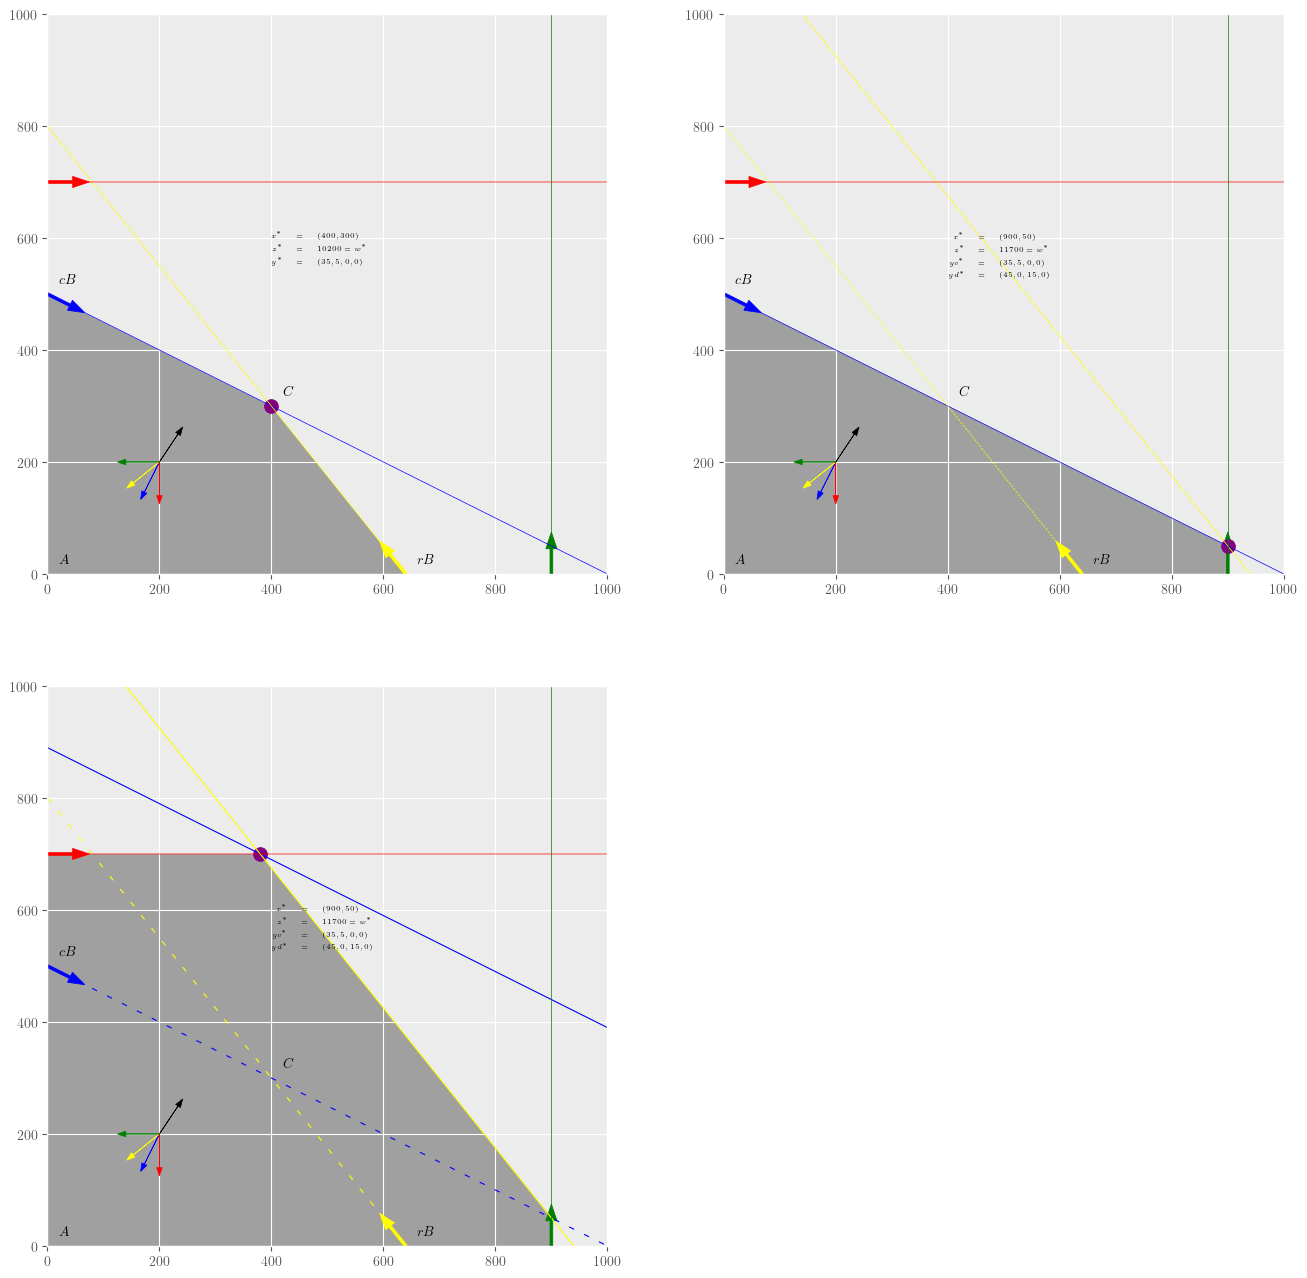

In [57]:
s =1000
x =np.linspace(0,s,10001)

# LINES
y1=-(1/2)*x+500
y2=-(5/4)*x+800
#y3
y4= (  0)*x+700

fig=plt.figure(figsize=(16,16));

##########

ax =plt.subplot(221);
ax.set_aspect(1);

# LINES
ax.plot   (x,y1,label='g1=b1',linewidth=0.5,color='blue');
ax.plot   (x,y2,label='g2=b2',linewidth=0.5,color='yellow');
ax.axvline( 900,label='g3=b3',linewidth=0.5,color='green');
ax.plot   (x,y4,label='g4=b4',linewidth=0.5,color='red');

# delz
ax.arrow(200,200,*unitVector(  delz)*75,color='black', width=0.01,head_width=10,length_includes_head=True);
# FEASIBLE SIDES <=
ax.arrow(200,200,*unitVector(-delg1)*75,color='blue',  width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg2)*75,color='yellow',width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg3)*75,color='green', width=0.01,head_width=10,length_includes_head=True);
ax.arrow(200,200,*unitVector(-delg4)*75,color='red',   width=0.01,head_width=10,length_includes_head=True);

# DIRECTIONS
ax.arrow(  0,500,*udg1*75,width=5,head_width=20,length_includes_head=True,color='blue');
ax.arrow(640,  0,*udg2*75,width=5,head_width=20,length_includes_head=True,color='yellow');
ax.arrow(900,  0,*udg3*75,width=5,head_width=20,length_includes_head=True,color='green');
ax.arrow(  0,700,*udg4*75,width=5,head_width=20,length_includes_head=True,color='red');

fx,fy=np.meshgrid(x,x)
plt.imshow(
  (
      (fy<=-(1/2)*fx+500)
    & (fy<=-(5/4)*fx+800)
    & (fy<= (  0)*fx+700)
  ).astype(int),
  extent=(fx.min(),fx.max(),fy.min(),fy.max()),
  origin='lower',
  cmap  ='Greys',
  alpha =0.3,
);

ax.set_xlim(0,s);
ax.set_ylim(0,s);
#ax.legend();

# xStar
ax.scatter(400,300,s=1e2,color='purple');

xStar=(
  r'\begin{eqnarray*}'
  r'x^*&=&(400,300)'
  r'\\'
  r'z^*&=&10200=w^*'
  r'\\'
  r'y^*&=&(35,5,0,0)'
  r'\end{eqnarray*}'
)
ax.text(400,600,xStar,fontsize=5);

# SIMPLEX
dx,dy=20,20
ax.annotate( '$A$',(  0+dx,  0+dy));
ax.annotate('$rB$',(640+dx,  0+dy));
ax.annotate('$cB$',(  0+dx,500+dy));
ax.annotate( '$C$',(400+dx,300+dy));

##########

ax2 =plt.subplot(222);
ax2.set_aspect(1);

# LINES
ax2.plot   (x,y1,label='g1=b1',linewidth=0.5,color='blue');
ax2.plot   (x,y2,label='g2=b2',linewidth=0.5,color='yellow',linestyle='--');
ax2.plot   (x,-(5/4)*(x-900)+50,label='g2=b2',linewidth=0.5,color='yellow');
ax2.axvline( 900,label='g3=b3',linewidth=0.5,color='green');
ax2.plot   (x,y4,label='g4=b4',linewidth=0.5,color='red');

# delz
ax2.arrow(200,200,*unitVector(  delz)*75,color='black', width=0.01,head_width=10,length_includes_head=True);
# FEASIBLE SIDES <=
ax2.arrow(200,200,*unitVector(-delg1)*75,color='blue',  width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg2)*75,color='yellow',width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg3)*75,color='green', width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg4)*75,color='red',   width=0.01,head_width=10,length_includes_head=True);

# DIRECTIONS
ax2.arrow(  0,500,*udg1*75,width=5,head_width=20,length_includes_head=True,color='blue');
ax2.arrow(640,  0,*udg2*75,width=5,head_width=20,length_includes_head=True,color='yellow');
ax2.arrow(900,  0,*udg3*75,width=5,head_width=20,length_includes_head=True,color='green');
ax2.arrow(  0,700,*udg4*75,width=5,head_width=20,length_includes_head=True,color='red');

fx,fy=np.meshgrid(x,x)
plt.imshow(
  (
      (fy<=-(1/2)* fx+500)
    & (fy<=-(5/4)*(fx-900)+50)
    & (fx<=900)
    & (fy<= (  0)* fx+700)
  ).astype(int),
  extent=(fx.min(),fx.max(),fy.min(),fy.max()),
  origin='lower',
  cmap  ='Greys',
  alpha =0.3,
);

ax2.set_xlim(0,s);
ax2.set_ylim(0,s);
#ax.legend();

# xStar
ax2.scatter(900, 50,s=1e2,color='purple');

xStar=(
  r'\begin{eqnarray*}'
  r'x^*&=&(900, 50)'
  r'\\'
  r'z^*&=&11700=w^*'
  r'\\'
  r'yc^*&=&(35,5,0,0)'
  r'\\'
  r'yd^*&=&(45,0,15,0)'
  r'\end{eqnarray*}'
)
ax2.text(400,600,xStar,fontsize=5);

# SIMPLEX
dx,dy=20,20
ax2.annotate( '$A$',(  0+dx,  0+dy));
ax2.annotate('$rB$',(640+dx,  0+dy));
ax2.annotate('$cB$',(  0+dx,500+dy));
ax2.annotate( '$C$',(400+dx,300+dy));

##########

ax2 =plt.subplot(223);
ax2.set_aspect(1);

# LINES
ax2.plot   (x,y1,label='g1=b1',linewidth=0.8,color='blue',linestyle=(0,(5,10)));
ax2.plot   (x,-(1/2)*(x-380)+700,label='g1=b1',linewidth=0.8,color='blue');
ax2.plot   (x,y2,label='g2=b2',linewidth=0.8,color='yellow',linestyle=(0,(5,10)));
ax2.plot   (x,-(5/4)*(x-900)+50,label='g2=b2',linewidth=0.8,color='yellow');
ax2.axvline( 900,label='g3=b3',linewidth=0.5,color='green');
ax2.plot   (x,y4,label='g4=b4',linewidth=0.5,color='red');

# delz
ax2.arrow(200,200,*unitVector(  delz)*75,color='black', width=0.01,head_width=10,length_includes_head=True);
# FEASIBLE SIDES <=
ax2.arrow(200,200,*unitVector(-delg1)*75,color='blue',  width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg2)*75,color='yellow',width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg3)*75,color='green', width=0.01,head_width=10,length_includes_head=True);
ax2.arrow(200,200,*unitVector(-delg4)*75,color='red',   width=0.01,head_width=10,length_includes_head=True);

# DIRECTIONS
ax2.arrow(  0,500,*udg1*75,width=5,head_width=20,length_includes_head=True,color='blue');
ax2.arrow(640,  0,*udg2*75,width=5,head_width=20,length_includes_head=True,color='yellow');
ax2.arrow(900,  0,*udg3*75,width=5,head_width=20,length_includes_head=True,color='green');
ax2.arrow(  0,700,*udg4*75,width=5,head_width=20,length_includes_head=True,color='red');

fx,fy=np.meshgrid(x,x)
plt.imshow(
  (
      (fy<=-(1/2)*(fx-380)+700)
    & (fy<=-(5/4)*(fx-900)+50)
    & (fx<=900)
    & (fy<= (  0)* fx+700)
  ).astype(int),
  extent=(fx.min(),fx.max(),fy.min(),fy.max()),
  origin='lower',
  cmap  ='Greys',
  alpha =0.3,
);

ax2.set_xlim(0,s);
ax2.set_ylim(0,s);
#ax.legend();

# xStar
ax2.scatter(380,700,s=1e2,color='purple');

xStar=(
  r'\begin{eqnarray*}'
  r'x^*&=&(900, 50)'
  r'\\'
  r'z^*&=&11700=w^*'
  r'\\'
  r'yc^*&=&(35,5,0,0)'
  r'\\'
  r'yd^*&=&(45,0,15,0)'
  r'\end{eqnarray*}'
)
ax2.text(400,600,xStar,fontsize=5);

# SIMPLEX
dx,dy=20,20
ax2.annotate( '$A$',(  0+dx,  0+dy));
ax2.annotate('$rB$',(640+dx,  0+dy));
ax2.annotate('$cB$',(  0+dx,500+dy));
ax2.annotate( '$C$',(400+dx,300+dy));

In [53]:
y2p=-(5/4)*(x1-900)+50
g2p= (5/4)*x1+x2-1175

g1max=-(1/2)*(x1-380)+700

display(
y2p,
solve([g2p,g4])
)

In [45]:
g1max